# Aim of the Project
The primary aim of this project is to determine whether there is a significant difference in the number of goals scored in women's international soccer matches compared to men's. Specifically, the investigation focuses on whether women's international soccer matches have a higher average number of goals than men's. To achieve this, a statistical hypothesis test will be performed using data from official FIFA World Cup matches (excluding qualifiers) since January 1, 2002.

# 1. Imports

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.9.0 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you h

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import mannwhitneyu

# 2. Load the Data

In [3]:
# Load men's and women's datasets
men = pd.read_csv("/kaggle/input/soccer-dataset/men_results.csv")
women = pd.read_csv("/kaggle/input/soccer-dataset/women_results.csv")

# 3. Filter the Data

In [4]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

# 4. Calculate Goals Scored

In [5]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [6]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# 5. Check for Normality

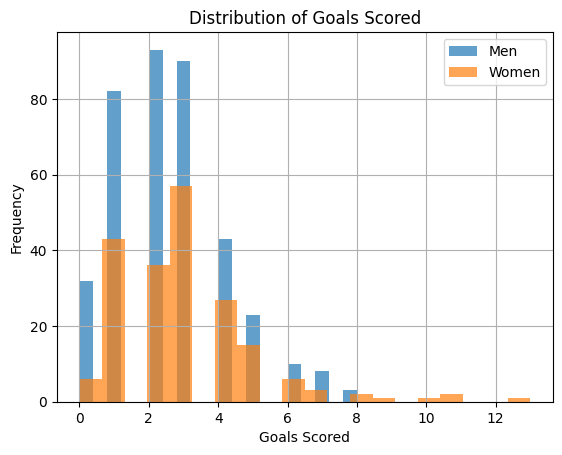

<Figure size 640x480 with 0 Axes>

In [7]:
# Determine normality using histograms
men_subset["goals_scored"].hist(bins=20, alpha=0.7, label='Men')
women_subset["goals_scored"].hist(bins=20, alpha=0.7, label='Women')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored')
plt.legend()
plt.show()
plt.clf()


# 6. Combine the Data

In [8]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)


# 7. Prepare Data for Mann-Whitney U Test

In [9]:
# Transform the data for the pingouin Mann-Whitney U test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")


# 8. Perform Mann-Whitney U Test with Pingouin

In [10]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pg.mwu(x=both_subset_wide["women"],
                    y=both_subset_wide["men"],
                    alternative="greater")


# 9. Perform Mann-Whitney U Test with SciPy

In [11]:
# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")


# 10. Extract and Compare P-Values

In [12]:
# Extract p-value as a float from pingouin results
p_val_pg = results_pg["p-val"].values[0]
# Extract p-value as a float from SciPy results
p_val_scipy = results_scipy.pvalue


# 11. Determine Hypothesis Test Result

In [13]:
# Determine hypothesis test result using significance level (0.10)
alpha = 0.10
result_pg = "reject" if p_val_pg <= alpha else "fail to reject"
result_scipy = "reject" if p_val_scipy <= alpha else "fail to reject"


# 12. Print and Store Results

In [14]:
# Print the results
print(f"Pingouin Mann-Whitney U test result: p-value = {p_val_pg:.4f}, decision = {result_pg}")
print(f"SciPy Mann-Whitney U test result: p-value = {p_val_scipy:.4f}, decision = {result_scipy}")

# Summary dictionary
result_dict = {"p_val_pg": p_val_pg, "result_pg": result_pg, "p_val_scipy": p_val_scipy, "result_scipy": result_scipy}

result_dict


Pingouin Mann-Whitney U test result: p-value = 0.0051, decision = reject
SciPy Mann-Whitney U test result: p-value = 0.0051, decision = reject


{'p_val_pg': 0.005106609825443641,
 'result_pg': 'reject',
 'p_val_scipy': 0.005106609825443641,
 'result_scipy': 'reject'}

**Statistical Test**
* Test Selection: Due to the non-normal distribution of the goal data, we employed the Mann-Whitney U test (a non-parametric test) to compare the two groups (men's and women's matches).

**Hypotheses:**
* Null Hypothesis (𝐻0): The mean number of goals scored in women's international soccer matches is the same as in men's.
* Alternative Hypothesis(𝐻𝑎): The mean number of goals scored in women's international soccer matches is greater than in men's.

**Results**
**Pingouin Mann-Whitney U Test:**
* p-value = 0.0051
* Decision: Reject the null hypothesis


**SciPy Mann-Whitney U Test:**
* p-value = 0.0051
* Decision: Reject the null hypothesis


**Interpretation**
* With a p-value of 0.0051, which is less than the significance level of 0.10, we reject the null hypothesis. This indicates that there is statistically significant evidence to suggest that more goals are scored in women's international soccer matches compared to men's.

# Summary
* The analysis confirms the initial hypothesis that more goals are scored in women's international soccer matches than in men's. This conclusion is based on the statistical tests applied to the filtered data from official FIFA World Cup matches since January 1, 2002. Both the Pingouin and SciPy implementations of the Mann-Whitney U test yielded identical p-values, strengthening the robustness of our results.